# Master d'Apprentissage Automatique en Langue: Day-1

## Apprentissage automatique des prix de ventes immobilières et complexité de modèle

Dans ce notebook nous allons explorer la regression comme technique d'apprentissage automatique. Nous illustrerons la cas de complexité d'apprentissage automatique sur les modèles d'apprentissage à savoir le biais et la variance
* Analyse de la regression linéaire sur les donnée d'apprentissage de House Sales in King County, USA, https://www.kaggle.com/harlfoxem/housesalesprediction
* Complexité des modèles: étude du compromis Biais Variance

## I- Analyse de la regression linéaire

### I.1 Chargement des librairies python

In [1042]:
import numpy as np # Algèbre linéaire
import pandas as pd # Traitement de données, fichier CSV E/S (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Visualisation des données
import seaborn as sns #Analyse statistique

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve


# les données se trouvent dans le réépertoire "../data/" directory.
#from subprocess import check_output

### I.2 Inspection des données

In [1043]:
df = pd.read_csv('../data/home_data.csv') 

In [1044]:
df.head(n=10) # Affichage des 10 premières lignes de données

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [1045]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.5+ MB


### Analyse descriptive des données.

In [1046]:
np.round(df.describe())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0
mean,4.580302e+09,540088.0,3.0,2.0,2080.0,15107.0,1.0,0.0,0.0,3.0,8.0,1788.0,292.0,1971.0,84.0,98078.0,48.0,-122.0,1987.0,12768.0
std,2.876566e+09,367127.0,1.0,1.0,918.0,41421.0,1.0,0.0,1.0,1.0,1.0,828.0,443.0,29.0,402.0,54.0,0.0,0.0,685.0,27304.0
min,1.000102e+06,75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,1.0,1.0,290.0,0.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0
25%,2.123049e+09,321950.0,3.0,2.0,1427.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,3.904930e+09,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0
75%,7.308900e+09,645000.0,4.0,2.0,2550.0,10688.0,2.0,0.0,0.0,4.0,8.0,2210.0,560.0,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0


In [1047]:
features = list(df.columns.values)
print("Variables caractérisant les données: \n",features)

Variables caractérisant les données: 
 ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [1048]:
features.remove('id')
features.remove('date')
df = df[features]

### Pretraitement des données

In [1049]:
df.isnull().any() # verifie si des données sont manquantes

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

Par cette observation, nous n'avons pas de completion des données à faire la matrice est non creuse. le pourcentage de données manquantes est nul

### Analyse des corrélations 
### Corrélation des variables avec le prix de vente d'une masion

In [1050]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

Sur la base d'un seuil de corrélation de 50%, quelles sont les variables potentielles à utiliser pour les modèles ?  

### Corrélation des variables enre elles

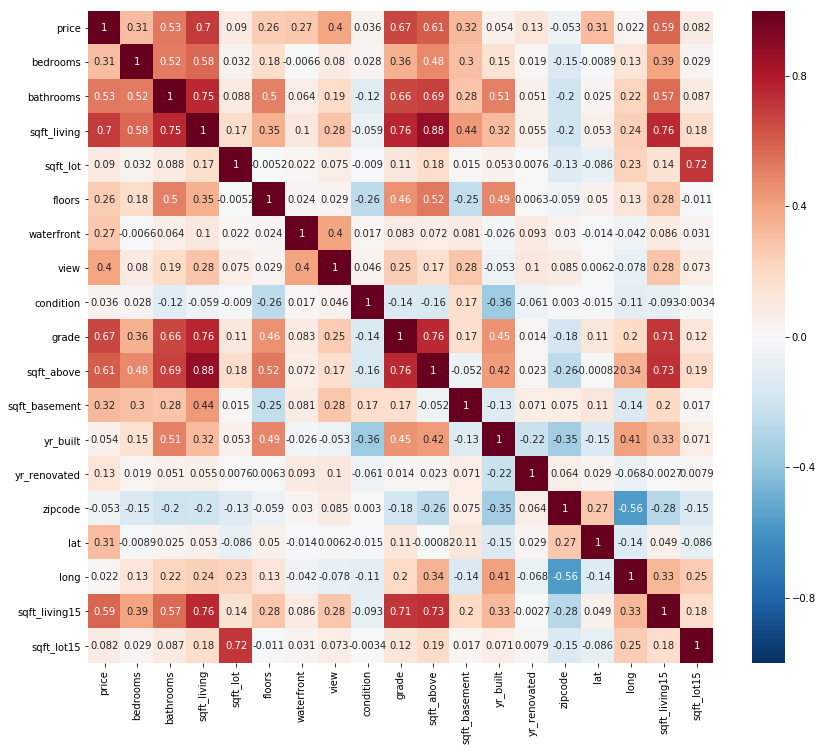

In [1051]:
correlation = df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

Les variables *sqft_living* et *bathrooms* sont fortement correlées ne doivent pas être associées lors de la phase d'apprentissage du modèle De bons algorithmes pour la sélection des variables d'apprentissage du modèle peuvent être utilisé notemment Lasso https://cs.nyu.edu/~roweis/csc2515-2006/readings/lasso.pdf et Ridge Regression https://www.math.arizona.edu/~hzhang/math574m/Read/RidgeRegressionBiasedEstimationForNonorthogonalProblems.pdf; pour pénaliser certaines variables du modèle 

### Construction de la matrice des caractéristiques #Features matrix

In [1052]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1 # Ajout d'une colonne constante ou bruit à un SFrame
    # ajoute la colonne 'constante' au début de la liste des fonctionnalités afin que nous puissions l'extraire avec les autres
    features = ['constant'] + features # vecteur caractéristique d'une instance de donnée
    # sélectionner les colonnes de la feuille de données par la liste de features dans features_sframe (constant intégré):
    features_sframe = data_sframe[features]

    # la ligne suivante convertira features_SFrame en une matrice numpy:
    features_sframe = features_sframe.values
    # affecter la colonne de data_sframe associée à la sortie à SArray output_sarray
    output_sarray = data_sframe[output]

    # Ce qui suit va convertir le SArray en un tableau numpy en le convertissant d'abord en une liste
    output_array = output_sarray.values
    return(features_sframe, output_array)

### Selection de la variable sqft_living pour le modèle

In [1053]:
features_0 = ['sqft_living']
features_1 = ['sqft_living', 'bedrooms']
target = 'price'
features.remove('price') #retrait de la variable explicative du modèle

In [1054]:
(X, Y) = get_numpy_data(df, features_1, target) 

In [1055]:
type(X) == type(Y)
print (X[0:5])

[[   1 1180    3]
 [   1 2570    3]
 [   1  770    2]
 [   1 1960    4]
 [   1 1680    3]]


In [1056]:
def plot_feature(features, df):
    plt.figure(figsize=(20, 5))
    for i, col in enumerate(features):
        plt.subplot(1, len(features) , i+1)
        x = df[col]
        y = df[target]/1000
        plt.scatter(x, y, marker='o')
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel('price (k$)')

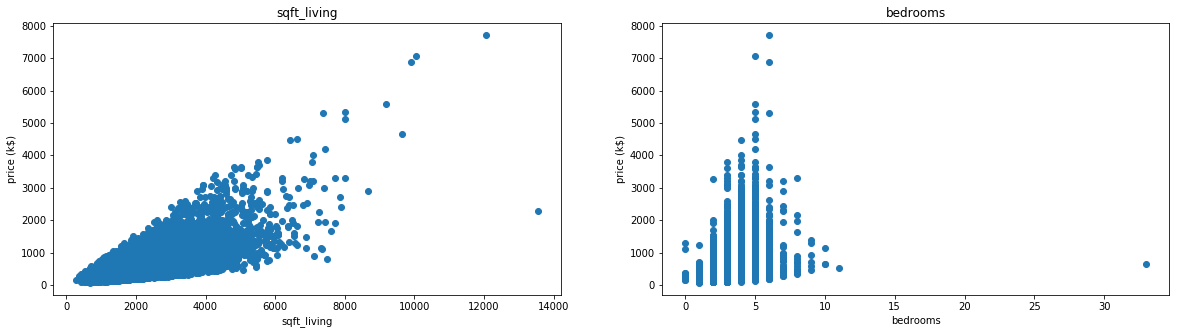

In [1057]:
plot_feature(features_1,df)


A l'aide de la méthode plot_feature, visualiser les données pour le features ['sqft_living', 'bedrooms','bathrooms']

## Apprentissage des données

In [1058]:
regression_model = LinearRegression()

## Regression unidimensionelle
**hypothèse**   $\hat{Y}$:    $price= \theta_{0}+sqft\_living*\theta_{1} $

In [1059]:
(X, Y) = get_numpy_data(df, features_0, target) 
print(X)

[[   1 1180]
 [   1 2570]
 [   1  770]
 ...
 [   1 1020]
 [   1 1600]
 [   1 1020]]


In [1060]:
def normalize(X,n):
    mean = np.mean(X[:,1:n+1],axis=0)
    std = np.std(X[:,1:n+1],axis=0)
    X_norm = (X[:,1:n+1]-mean)/std
    featX = X.astype('float64')
    featX[:,1:n+1]= X_norm
    return featX, mean, std

#### Division et permutation des données

In [1061]:
n = X.shape[1] #dimension du vecteur d'entrée
(Xnorm,mean,std) = normalize(X,n) #Normalisation des données
#print(Xnorm.shape)
#print(std)
X_train, X_test, Y_train, Y_test = train_test_split(Xnorm, Y, test_size = 0.2, random_state=5)
#print (X_train)

In [1062]:
Res = regression_model.fit(X_train,Y_train)

In [1063]:
Y_test_pred = Res.predict(X_test)
print (np.shape(Y_test_pred))

(4323,)


#### Fonction de Coût
$cost = RMSE = \frac{1}{n-1}\sqrt{\sum {(y_{i}-\hat{y}_{i})}^2}$

In [1064]:
def cout_modele(yp,y):
    ypr = np.vstack(yp)
    y = np.vstack(y)
    diff= ypr-y
    cost = np.sqrt(np.dot(diff.T,diff))/(ypr.shape[0]-1)
    #cost = np.sqrt(np.sum((ypr-y)**2))
    #cost2 = np.sqrt(mean_squared_error(Y_test_pred, Y_test ))
    print(cost)
    return cost

In [1065]:
cout_modele(Y_test_pred, Y_test )

[[3972.81692667]]


array([[3972.81692667]])

In [1066]:
regression_model = LinearRegression()

### Modélisaion des motifs

In [1067]:
def processing(Xtrain):
    Xnor,mean,std = normalize(Xtrain,Xtrain.shape[1])
    Xnor_train, Xnor_test, Y_train, Y_test = train_test_split(Xnor, Y, test_size = 0.2, random_state=5)
    clf = regression_model.fit(Xnor_train,Y_train)
    Ypred = clf.predict(Xnor_test)
    Ypredtrain = clf.predict(Xnor_train)
    return cout_modele(Ypred, Y_test ),cout_modele(Ypredtrain, Y_train )

In [1068]:
print("first model features: ",features_0)
(Xtrain, Y) = get_numpy_data(df, features_0, target) 
print (Xtrain.shape)
processing(Xtrain)

first model features:  ['sqft_living']
(21613, 2)
[[3972.81692667]]
[[1988.94477471]]


(array([[3972.81692667]]), array([[1988.94477471]]))

In [1069]:
print("2nd model features: ",features_1)
(Xtrain2, Y) = get_numpy_data(df, features_1, target) 
print (Xtrain2.shape)
processing(Xtrain2)

2nd model features:  ['sqft_living', 'bedrooms']
(21613, 3)
[[3909.92806173]]
[[1962.39962891]]


(array([[3909.92806173]]), array([[1962.39962891]]))

In [1070]:
print(features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


## Regression multilinéaire
**Analyse de la dimensionalité** **hypothèse**   $\hat{Y}$:    $price= \theta_{0}+sqft\_living*\theta_{1}+ bedrooms*\theta_{2}+\dots+sqft\_lot15*\theta_{d}$

In [972]:
for i, featureset in enumerate([['sqft_living'],['sqft_living', 'bedrooms'],['sqft_living', 'bedrooms','bathrooms'],['sqft_living', 'bedrooms','bathrooms','sqft_lot15'],features ]):
    print("model {} features: ".format(i+1),featureset)
    (Xtrain, Y) = get_numpy_data(df, featureset, target) 
    cost = processing(Xtrain)
    print("RMSE_test: {} RMSE_train:{} ".format(cost[0],cost[1]))

model 1 features:  ['sqft_living']
[[3972.81692667]]
[[1988.94477471]]
RMSE_test: [[3972.81692667]] RMSE_train:[[1988.94477471]] 
model 2 features:  ['sqft_living', 'bedrooms']
[[3909.92806173]]
[[1962.39962891]]
RMSE_test: [[3909.92806173]] RMSE_train:[[1962.39962891]] 
model 3 features:  ['sqft_living', 'bedrooms', 'bathrooms']
[[3908.71492305]]
[[1962.35831673]]
RMSE_test: [[3908.71492305]] RMSE_train:[[1962.35831673]] 
model 4 features:  ['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot15']
[[3896.02199865]]
[[1955.59789656]]
RMSE_test: [[3896.02199865]] RMSE_train:[[1955.59789656]] 
model 5 features:  ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
[[3078.07476986]]
[[1527.97529449]]
RMSE_test: [[3078.07476986]] RMSE_train:[[1527.97529449]] 


Quelle est l'erreur générer par modèle admettant les caractéristiques ['sqft_living', 'bedrooms','bathrooms','sqft_lot15'] ?

# Etude de la complexité du modèle liée aux données d'entrainement.

In [978]:
advanced_features =['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'zipcode',
 'condition',
 'grade',
 'waterfront',
 'view',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [1018]:
train_sizes =[100,1000,2000,4000,6000,8000,10000,12000,13500] #heuristique

Cette fonction étudie la complexité sur **la taille des données d'entrainement** du modèle elle utilise une technique de K-cross validation pour la sélection des paramètres de modèle
Le **score du modèle** est donnée par  $cost = -RMSE = -\frac{1}{n-1}\sqrt{\sum {(y_{i}-\hat{y}_{i})}^2}$

In [1033]:
def learning_curves(estimator, data, advanced_features, target, train_sizes, cv,normalize_data=False):
    (X, Y) = get_numpy_data(df, advanced_features, target)
    if normalize_data == True : 
        Xnor,mean,std = normalize(Xtrain,Xtrain.shape[1])
        Xnor_train, Xnor_test, Y_train, Y_test = train_test_split(Xnor, Y, test_size = 0.2, random_state=5)
        
    Xnor_train, Xnor_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, Xnor_train, Y_train, train_sizes =
    train_sizes,
    cv = cv, scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)
    #print ("Train scores: ",train_scores)
    #print ("Validation scores: ",validation_scores)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = ' ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    #plt.ylim(0,40)

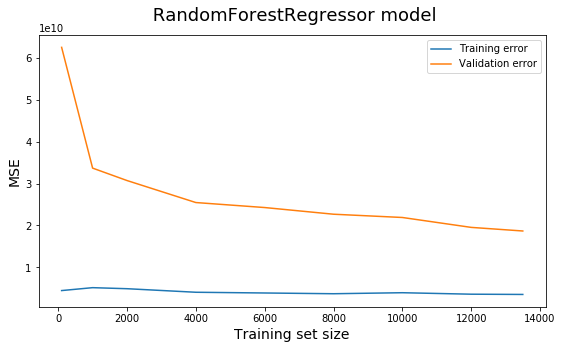

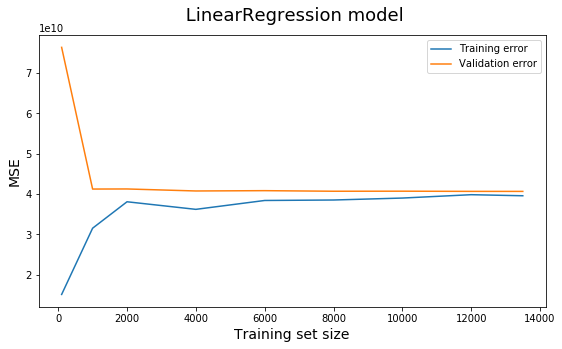

In [1036]:
for model, i in [(RandomForestRegressor(), 1),(LinearRegression(),2)]:
    plt.figure(figsize=(20, 5))
    plt.subplot(1,2,i)
    learning_curves(model, df, advanced_features, target, train_sizes, 10,False)

### Interprétation Régression linéaire
D'après la courbe, le modèle de **regression linéaire** souffre du **sous apprentissage**. Il aura des difficulté à prédire correctement 
les prix de maison sur **les données  figurant dans sa base d'apprentissage**. En effet l'erreur d'apprentissage est grande **variance elevée**
et l'erreur de validation est petite **biais reduit**.  Ce sous apprentissage implique quelques soit le nombre de données d'entrainement ajouté au modèle, la généralisation sera faible


### solution changé 
Notre problème peut être résolu si on change d'algorithme d'apprentissage.

### Interprétation Régression de forêt aléatoire
D'après la courbe, le modèle de regression de forêt aléatoire souffre du sur apprentissage. Il aura des difficulté à prédire correctement les prix de maison sur **les données ne figurant pas dans sa base d'apprentissage**. En effet l'erreur d'apprentissage est faible **variance faible** et l'erreur de validation est élevé **biais élevé**. Ce sur apprentissage implique quelques soit le nombre de données d'entrainement ajouté au modèle, la généralisation sera faible

### solution changé
Notre problème peut être résolu si on augmente la complexité du modèle

**Augmentation complexité du modèle**: Le paramètre est le nombre d'instance maximum par feuille dans la forêt aléatoire **max_leaf_nodes**

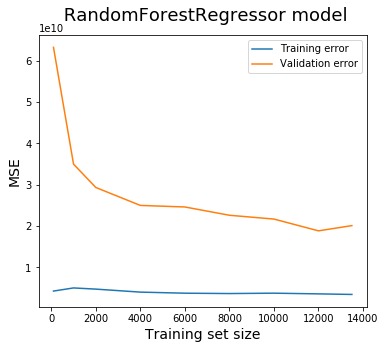

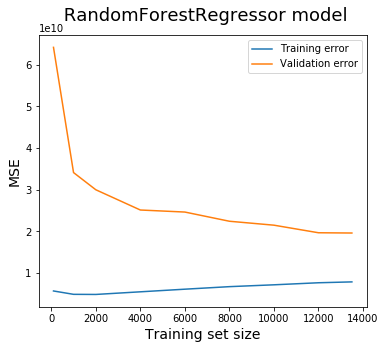

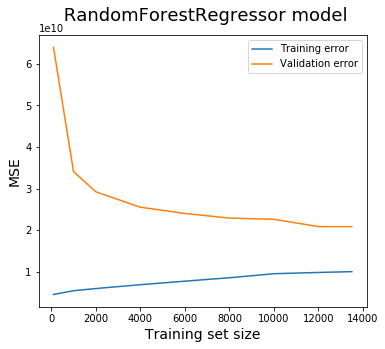

In [1041]:
for model, i in [(RandomForestRegressor(), 1),(RandomForestRegressor(max_leaf_nodes = 350), 2),(RandomForestRegressor(max_leaf_nodes = 200), 3)]:
    plt.figure(figsize=(20, 5))
    plt.subplot(1,3,i)
    learning_curves(model, df, advanced_features, target, train_sizes, 10,False)

plus on on réduit **max_leaf_node** mieux le modèle commence à se stabiliser, et améliorer sa performance. On s'arretera lorsque 
l'écart entre les deux erreurs: le **gap** devient constant $gap = Erreur\_validation - Erreur\_apprentissage$